# The seventh Korea National Health and Nutrition Examination Survey (KNHANES Ⅶ) 
## Nutrition Examination Survey, Demographic characteristics and Cardiovascular disease

- Korea Centers for Disease Control and Prevention
- [DOWNLOAD](https://knhanes.cdc.go.kr/knhanes/sub03/sub03_02_02.do)

# Data preprocessing
## Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Visualization Setting

In [3]:
# Window Korean Font
plt.rc('font', family='Malgun Gothic')

%matplotlib inline

from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## Data

In [4]:
df = pd.read_csv("Cardiovascular_NT.csv", low_memory=False)

col_names =['N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_N3',
       'N_N6', 'N_CHOL', 'N_CHO', 'N_TDF', 'N_SUGAR', 'N_CA', 'N_PHOS', 'N_FE',
       'N_NA', 'N_K', 'N_VA', 'N_VA_RAE', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2',
       'N_NIAC']

df.shape

(24269, 32)

In [5]:
df_pp = df.copy(deep=False)

print(df_pp.shape)
df_pp = df_pp.dropna(axis=0)
print(df_pp.shape)

(24269, 32)
(19389, 32)


In [6]:
drop_index = df_pp[(df_pp['DI3_dg'] == 8) | (df_pp['DI3_dg'] == 9)].index
df_pp = df_pp.drop(drop_index)
print(df_pp.shape)
drop_index = df_pp[(df_pp['DI5_dg'] == 8) | (df_pp['DI5_dg'] == 9)].index
df_pp = df_pp.drop(drop_index)
print(df_pp.shape)
drop_index = df_pp[(df_pp['DI6_dg'] == 8) | (df_pp['DI6_dg'] == 9)].index
df_pp = df_pp.drop(drop_index)
print(df_pp.shape)

(15267, 32)
(15267, 32)
(15267, 32)


In [11]:
df_pp.to_csv('Cardiovascular_NT_no_outlier.csv', index = None)

In [13]:
df = pd.read_csv("Cardiovascular_NT_no_outlier.csv", low_memory=False)

## Remove Multicollinearity
- 다중공선성 : 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우
- 분산팽창계수(VIF) > 10 변수 제거
- 종속 변수가 0 또는 1이므로 로지스틱 회귀를 사용해야하지만,
- 종속 변수가 명목 변수이므로 linear regression를 사용하여 VIF를 구함

In [16]:
# DI3_dg
df1 = df.copy(deep=False)

# DI5_dg
df2 = df.copy(deep=False)

# DI6_dg
df3 = df.copy(deep=False)


del df1["DI5_dg"]
del df1["DI6_dg"]
del df1["ID"]

del df2["DI3_dg"]
del df2["DI6_dg"]
del df2["ID"]

del df3["DI3_dg"]
del df3["DI5_dg"]
del df3["ID"]

input_col =['sex', 'age', 'incm', 'edu', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_N3', 'N_N6', 'N_CHOL', 'N_CHO', 
            'N_TDF', 'N_SUGAR', 'N_CA', 'N_PHOS', 'N_FE', 'N_NA', 'N_K', 'N_VA', 'N_VA_RAE', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC']

df1.to_csv('DI3_dg_no.csv', index = None)
df2.to_csv('DI5_dg_no.csv', index = None)
df3.to_csv('DI6_dg_no.csv', index = None)

df1.shape

(15267, 29)

In [17]:
from statsmodels.formula.api import ols

model1 = ols('DI3_dg ~ sex + age+ incm + edu + N_WATER + N_PROT + N_FAT + N_SFA + N_MUFA + N_PUFA + N_N3 + N_N6 + N_CHOL + N_CHO + N_TDF + \
            N_SUGAR + N_CA + N_PHOS + N_FE + N_NA + N_K + N_VA + N_VA_RAE + \
            N_CAROT + N_RETIN + N_B1 + N_B2 + N_NIAC', df1)

res1 = model1.fit()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


pd.DataFrame({'독립변수': column, 'VIF': variance_inflation_factor(model1.exog, i)} 
             for i, column in enumerate(model1.exog_names)
             if column != 'Intercept')

,독립변수,VIF
0,sex,1.169071
1,age,1.872861
2,incm,1.082778
3,edu,1.847703
4,N_WATER,3.838696
5,N_PROT,9.164574
6,N_FAT,55.689977
7,N_SFA,15.376497
8,N_MUFA,13.890128
9,N_PUFA,9.006620


- 제거 대상
    - N_FAT : 55.689977
    - N_SFA : 15.376497
    - N_MUFA : 13.890128
    - N_PHOS : 24.176492
    - N_K : 10.398883
    - N_VA : 18.825247
    - N_CAROT : 11.471479

In [19]:
model2 = ols('DI5_dg ~ sex + age+ incm + edu + N_WATER + N_PROT + N_FAT + N_SFA + N_MUFA + N_PUFA + N_N3 + N_N6 + N_CHOL + N_CHO + N_TDF + \
            N_SUGAR + N_CA + N_PHOS + N_FE + N_NA + N_K + N_VA + N_VA_RAE + \
            N_CAROT + N_RETIN + N_B1 + N_B2 + N_NIAC', df2)

res2 = model2.fit()

# res2.summary()

In [20]:
pd.DataFrame({'독립변수': column, 'VIF': variance_inflation_factor(model2.exog, i)} 
             for i, column in enumerate(model2.exog_names)
             if column != 'Intercept')

,독립변수,VIF
0,sex,1.169071
1,age,1.872861
2,incm,1.082778
3,edu,1.847703
4,N_WATER,3.838696
5,N_PROT,9.164574
6,N_FAT,55.689977
7,N_SFA,15.376497
8,N_MUFA,13.890128
9,N_PUFA,9.006620


- 제거 대상
    - N_FAT : 55.689977
    - N_SFA : 15.376497
    - N_MUFA : 13.890128
    - N_PHOS : 24.176492
    - N_K : 10.398883
    - N_VA : 18.825247
    - N_CAROT : 11.471479

In [21]:
model3 = ols('DI6_dg ~ sex + age+ incm + edu + N_WATER + N_PROT + N_FAT + N_SFA + N_MUFA + N_PUFA + N_N3 + N_N6 + N_CHOL + N_CHO + N_TDF + \
            N_SUGAR + N_CA + N_PHOS + N_FE + N_NA + N_K + N_VA + N_VA_RAE + \
            N_CAROT + N_RETIN + N_B1 + N_B2 + N_NIAC', df3)

res3 = model3.fit()

# res3.summary()

In [22]:
pd.DataFrame({'독립변수': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')


,독립변수,VIF
0,sex,1.169071
1,age,1.872861
2,incm,1.082778
3,edu,1.847703
4,N_WATER,3.838696
5,N_PROT,9.164574
6,N_FAT,55.689977
7,N_SFA,15.376497
8,N_MUFA,13.890128
9,N_PUFA,9.006620


- 제거 대상
    - N_FAT : 55.689977
    - N_SFA : 15.376497
    - N_MUFA : 13.890128
    - N_PHOS : 24.176492
    - N_K : 10.398883
    - N_VA : 18.825247
    - N_CAROT : 11.471479

In [24]:
del df1["N_FAT"]
del df1["N_SFA"]
del df1["N_MUFA"]
del df1["N_PHOS"]
del df1["N_K"]
del df1["N_VA"]
del df1["N_CAROT"]

del df2["N_FAT"]
del df2["N_SFA"]
del df2["N_MUFA"]
del df2["N_PHOS"]
del df2["N_K"]
del df2["N_VA"]
del df2["N_CAROT"]

del df3["N_FAT"]
del df3["N_SFA"]
del df3["N_MUFA"]
del df3["N_PHOS"]
del df3["N_K"]
del df3["N_VA"]
del df3["N_CAROT"]

## Correlation analysis

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


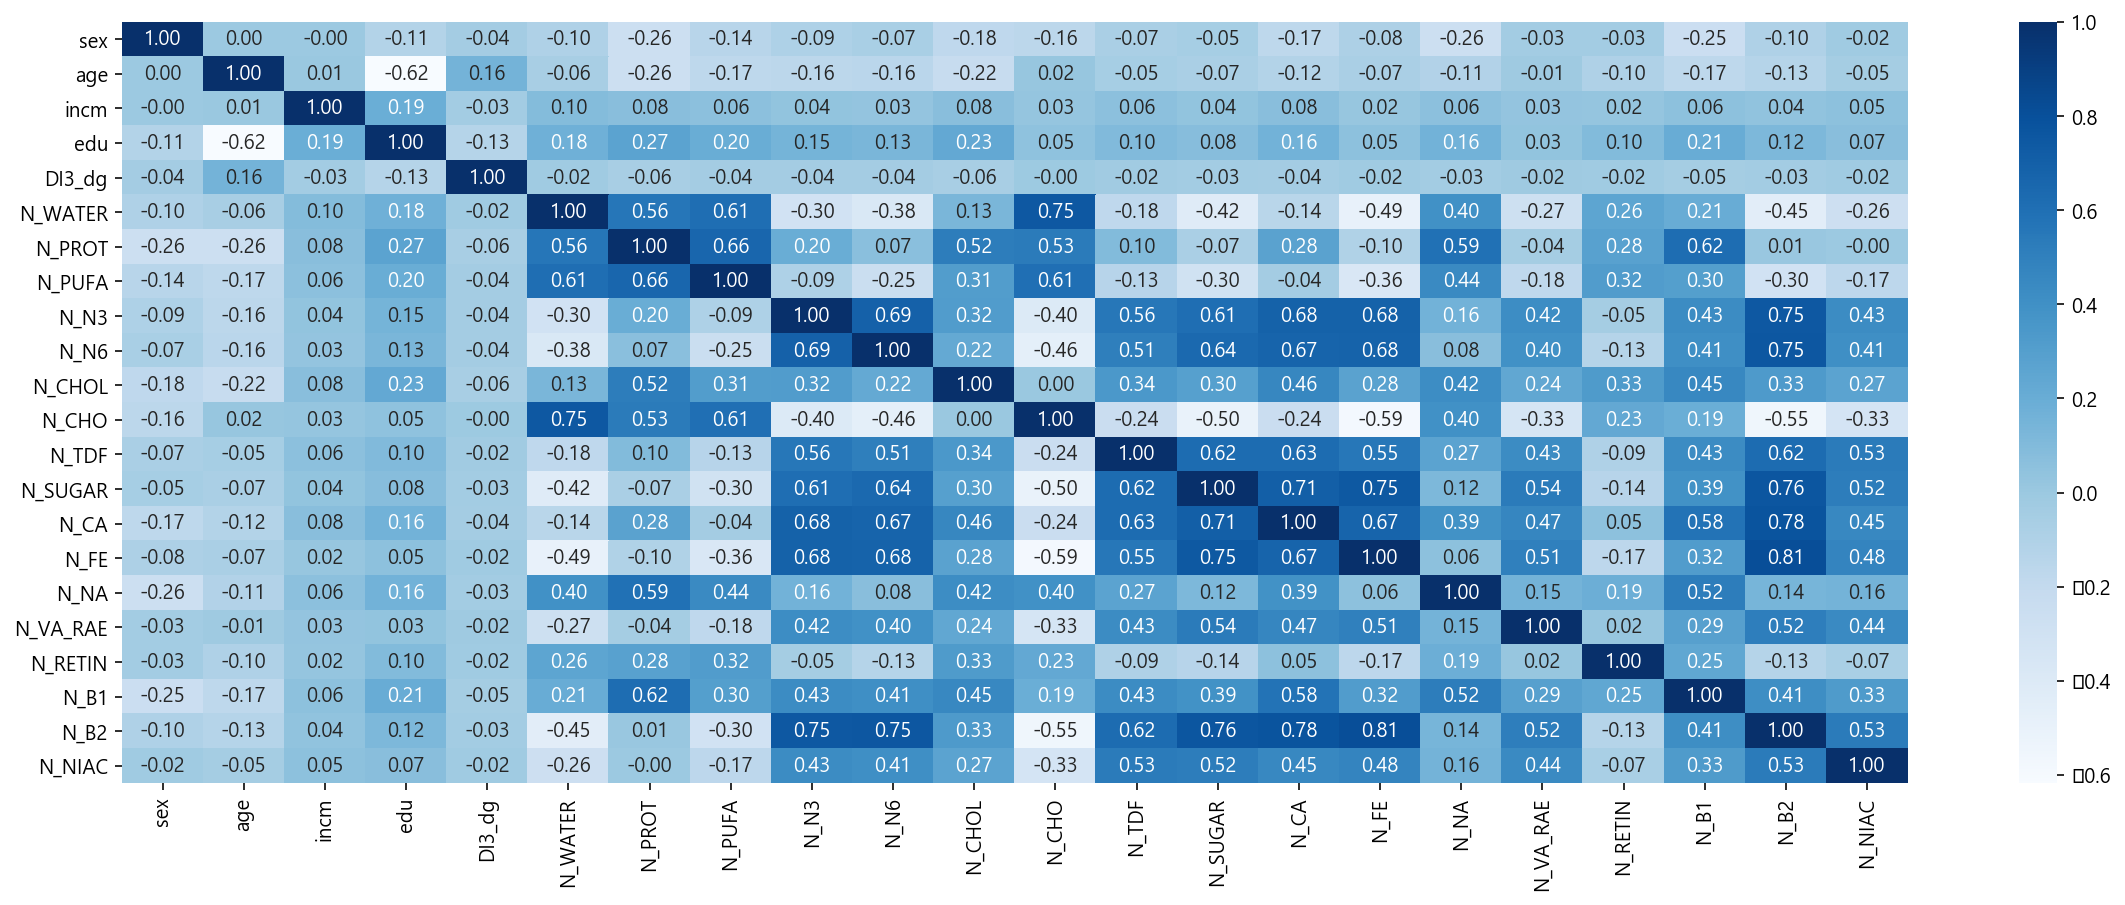

In [26]:
df1_corr = df1.corr()

mask = np.triu(np.ones_like(df1_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df1_corr, annot=True, fmt=".2f", cmap="Blues")

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


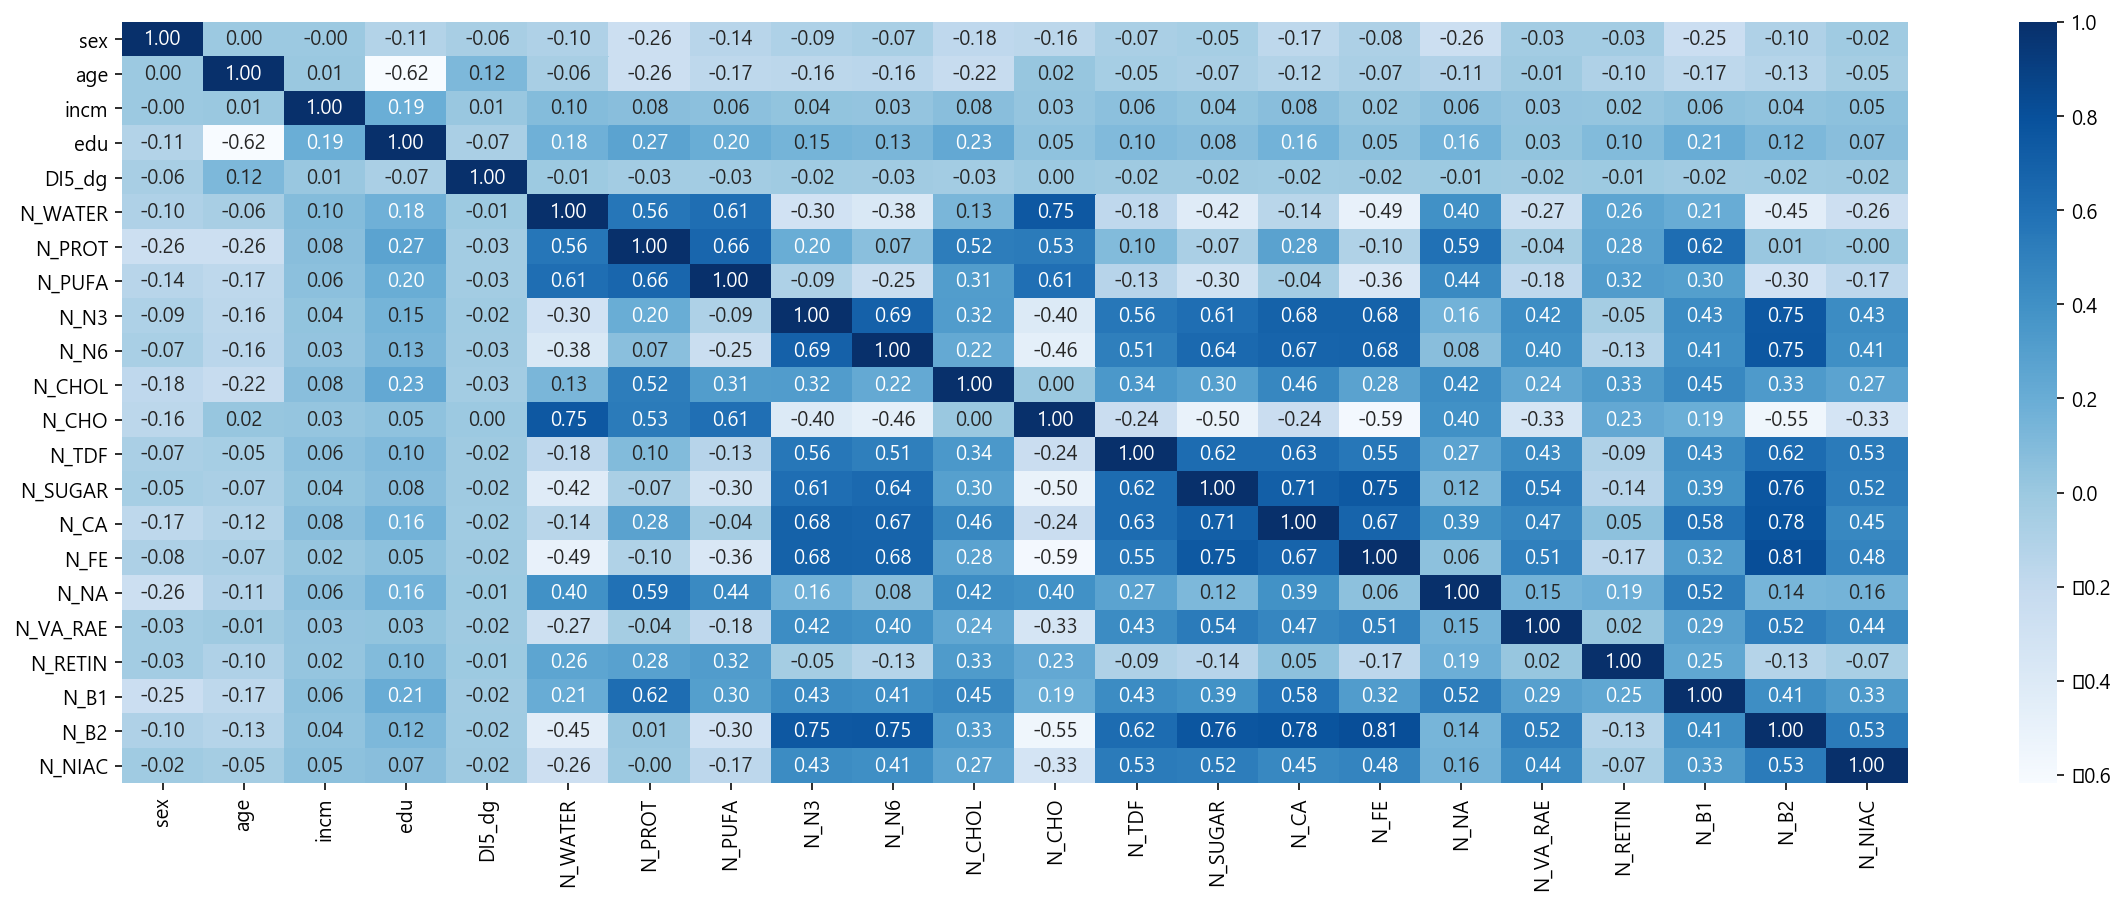

In [27]:
df2_corr = df2.corr()

mask = np.triu(np.ones_like(df2_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df2_corr, annot=True, fmt=".2f", cmap="Blues")

C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


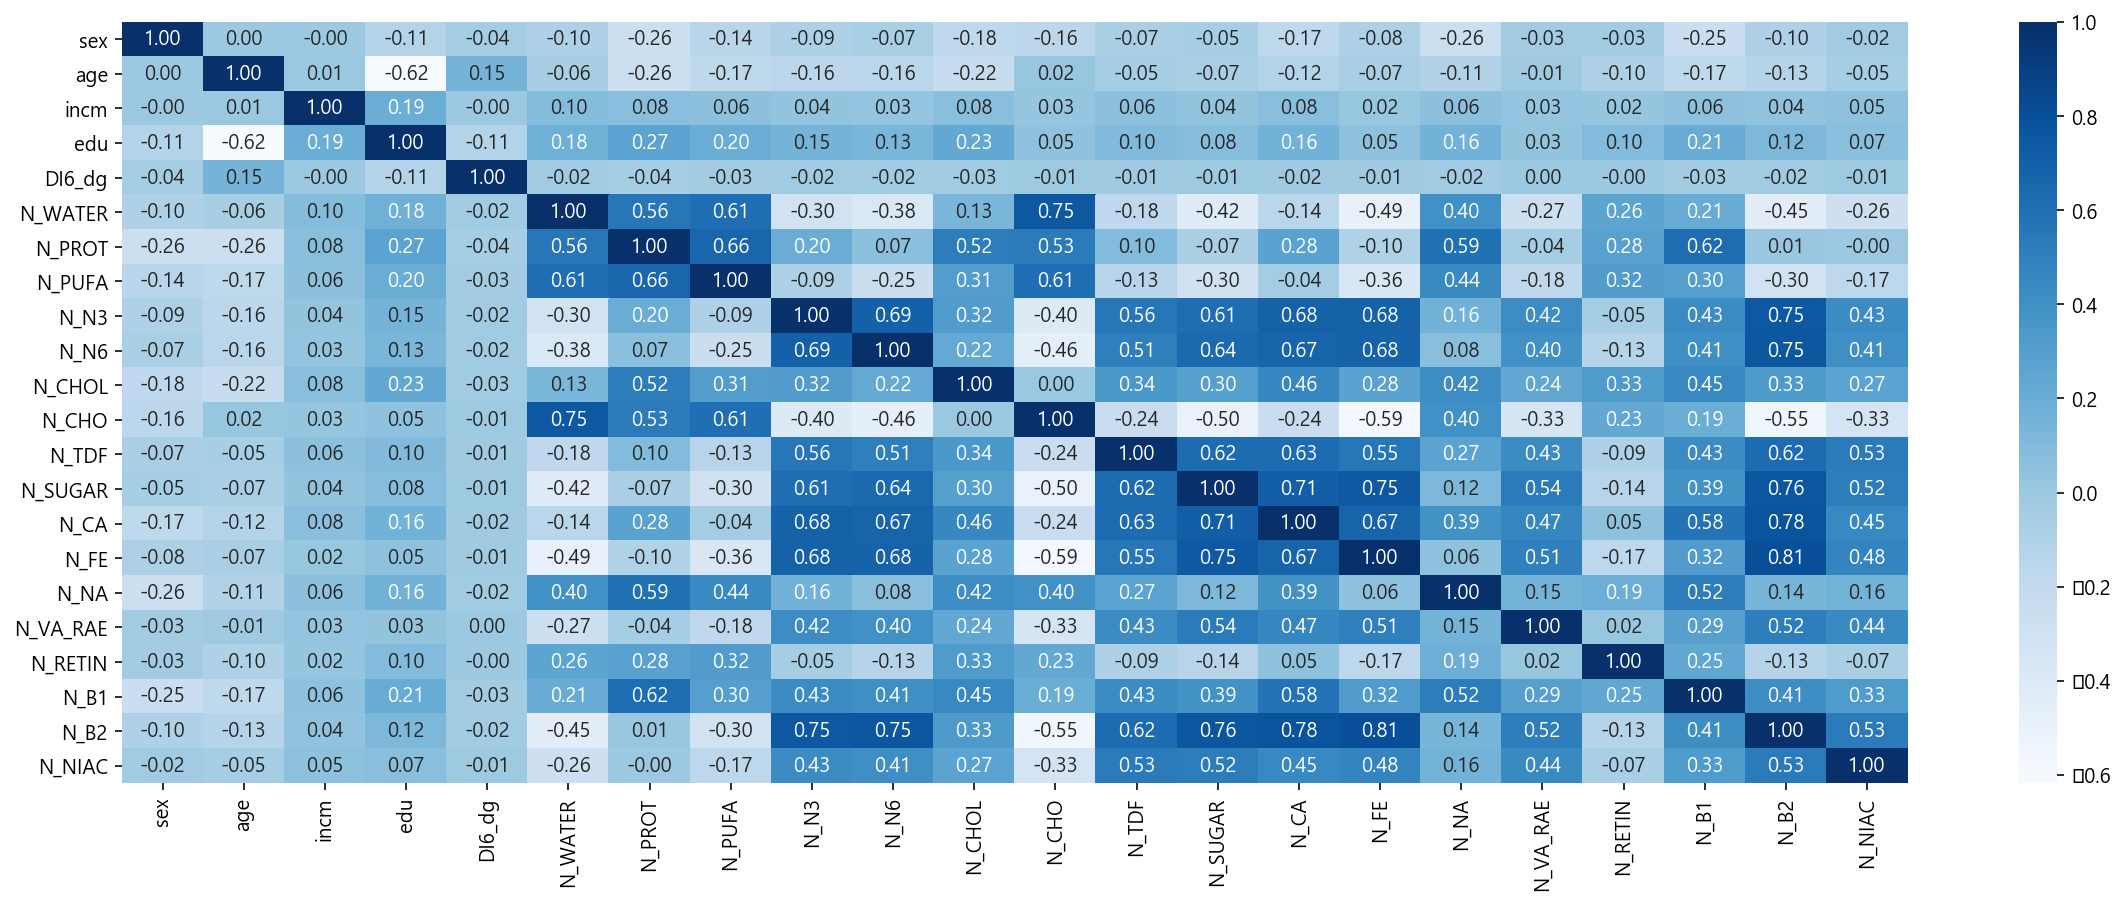

In [28]:
df3_corr = df3.corr()

mask = np.triu(np.ones_like(df3_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df3_corr, annot=True, fmt=".2f", cmap="Blues")

- 상관관계가 높은 변수가 영양소라는 특성을 고려하여 따로 제거하지 않음

(6031, 29)

# Machine Learning
## Logistic Regression

In [29]:
input_data = df1[['sex', 'age', 'incm', 'edu', 'N_WATER', 'N_PROT', 'N_PUFA', 'N_CHOL', 'N_CHO', 
            'N_TDF', 'N_SUGAR', 'N_CA', 'N_FE', 'N_NA', 'N_VA_RAE', 'N_B1', 'N_B2', 'N_NIAC']]

# input_data2 = df2[['sex', 'age', 'incm', 'edu', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 
#            'N_TDF', 'N_SUGAR', 'N_CA', 'N_PHOS', 'N_FE', 'N_NA', 'N_K', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC']]
# input_data3 = df3[['sex', 'age', 'incm', 'edu', 'N_WATER', 'N_PROT', 'N_FAT', 'N_SFA', 'N_MUFA', 'N_PUFA', 'N_CHOL', 'N_CHO', 
#            'N_TDF', 'N_SUGAR', 'N_CA', 'N_PHOS', 'N_FE', 'N_NA', 'N_K', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC']]


### Modeling

In [30]:
import statsmodels.api as sm

logit1 = sm.Logit(df1[['DI3_dg']],input_data)
result1 = logit1.fit()

logit2 = sm.Logit(df2[['DI5_dg']],input_data)
result2 = logit2.fit()

logit3 = sm.Logit(df3[['DI6_dg']],input_data)
result3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.102514
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.056880
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.095003
         Iterations 9


In [139]:
odd1 = np.exp(result1.params) < 1.03
odd2 = np.exp(result1.params) > 0.97

print(odd1 & odd2)

N_PUFA    False
N_FE      False
N_B1      False
N_B2      False
N_NIAC    False
dtype: bool


### Model Analysis
#### Stroke

In [37]:
print(result1.summary2())  

print(np.exp(result1.params))

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.111     
Dependent Variable: DI3_dg           AIC:              3166.1718 
Date:               2020-08-13 10:34 BIC:              3303.5739 
No. Observations:   15267            Log-Likelihood:   -1565.1   
Df Model:           17               LL-Null:          -1760.3   
Df Residuals:       15249            LLR p-value:      1.8499e-72
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex          -1.3732    0.0982  -13.9782  0.0000  -1.5658  -1.1807
age           0.0202    0.0027    7.3824  0.0000   0.0148   0.0256
incm         -0.1468    0.0507   -2.8962  0.0038  -0.2462  -0.0475
edu          -0.5455    0.0507

- coef(편회귀계수) : 값이 양수이면 컬럼의 값이 커질수록 종속변수가 1일 확률이 높아짐
- coef(편회귀계수) : 값이 음수이면 컬럼의 값이 커질수록 종속변수가 0일 확률이 높아짐
    - coef > 0 : age, N_WATER, N_PUFA, N_TDF, N_CA, N_NIAC
    - coef = 0 : N_NA, N_VA_RAE
    - coef < 0 : sex, incm, edu, N_PROT, N_CHOL, N_CHO, `N_SUGAR`, N_FE, N_B1, N_B2
    

- P>|t|(유의확률) : (95%의 신뢰도를 가져야 유의미하다고 판단) 독립변수의 유의확률은 0.05보다 작은 값이여야함.
    - P>|t| < 0.05 : sex, age, incm, edu, `N_CHOL`, N_CHO, `N_TDF`
    

- Odd rate가 1을 기준으로 큰지 작은지를 파악하여 종속변수에 미치는 영향의 방향을 파악
- Odd rate이 1에서 멀리 떨어질수록 종속변수와의 관계가 강함
    - sex, edu, incm, N_B1


#### Myocardial infarction

In [39]:
print(result2.summary2())  

print(np.exp(result2.params))

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.116     
Dependent Variable: DI5_dg           AIC:              1772.7837 
Date:               2020-08-13 10:39 BIC:              1910.1858 
No. Observations:   15267            Log-Likelihood:   -868.39   
Df Model:           17               LL-Null:          -982.65   
Df Residuals:       15249            LLR p-value:      4.9529e-39
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex          -2.2456    0.1610  -13.9484  0.0000  -2.5612  -1.9301
age           0.0187    0.0038    4.8913  0.0000   0.0112   0.0262
incm          0.1270    0.0699    1.8166  0.0693  -0.0100   0.2640
edu          -0.5371    0.0699

- coef(편회귀계수) : 값이 양수이면 컬럼의 값이 커질수록 종속변수가 1일 확률이 높아짐
- coef(편회귀계수) : 값이 음수이면 컬럼의 값이 커질수록 종속변수가 0일 확률이 높아짐
    - coef > 0 : age, incm, N_WATER, N_PUFA, N_TDF, N_SUGAR, N_CA, N_NA, N_NIAC
    - coef = 0 : 
    - coef < 0 : sex, edu, N_PROT, N_CHOL, N_CHO, N_FE, N_VA_RAE, N_B1, N_B2
    

- P>|t|(유의확률) : (95%의 신뢰도를 가져야 유의미하다고 판단) 독립변수의 유의확률은 0.05보다 작은 값이여야함.
    - P>|t| < 0.05 : sex, age, edu, `N_WATER`, N_CHO, `N_FE`
    

- Odd rate가 1을 기준으로 큰지 작은지를 파악하여 종속변수에 미치는 영향의 방향을 파악
- Odd rate이 1에서 멀리 떨어질수록 종속변수와의 관계가 강함
    - sex, edu


#### Angina

In [41]:
print(result3.summary2())

print(np.exp(result3.params))

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.089     
Dependent Variable: DI6_dg           AIC:              2936.8237 
Date:               2020-08-13 10:44 BIC:              3074.2258 
No. Observations:   15267            Log-Likelihood:   -1450.4   
Df Model:           17               LL-Null:          -1591.7   
Df Residuals:       15249            LLR p-value:      4.1966e-50
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
sex          -1.5252    0.1056  -14.4376  0.0000  -1.7322  -1.3181
age           0.0159    0.0029    5.5724  0.0000   0.0103   0.0215
incm         -0.0016    0.0522   -0.0305  0.9757  -0.1040   0.1008
edu          -0.6372    0.0535

- coef(편회귀계수) : 값이 양수이면 컬럼의 값이 커질수록 종속변수가 1일 확률이 높아짐
- coef(편회귀계수) : 값이 음수이면 컬럼의 값이 커질수록 종속변수가 0일 확률이 높아짐
    - coef > 0 : age, N_WATER, N_TDF, N_SUGAR, N_CA, N_NIAC
    - coef = 0 : N_VA_RAE
    - coef < 0 : sex, incm, edu, N_PROT, `N_PUFA`, N_CHOL, N_CHO, N_FE, `N_NA`, N_B1, N_B2
    

- P>|t|(유의확률) : (95%의 신뢰도를 가져야 유의미하다고 판단) 독립변수의 유의확률은 0.05보다 작은 값이여야함.
    - P>|t| < 0.05 : sex, age, edu, N_CHO, `N_FE`
    

- Odd rate가 1을 기준으로 큰지 작은지를 파악하여 종속변수에 미치는 영향의 방향을 파악
- Odd rate이 1에서 멀리 떨어질수록 종속변수와의 관계가 강함
    - sex, edu, N_B1


In [22]:
input_data1

,sex,age,incm,edu,N_WATER,N_PROT,N_FAT,N_SFA,N_MUFA,N_PUFA,...,N_FE,N_NA,N_K,N_VA,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC
0,2,68,2.0,1.0,4.80,0.84,0.22,0.21,0.37,0.02,...,16.85,266.10,33.16,16.58,198.96,0.00,0.07,0.05,0.70,7.34
1,1,76,3.0,3.0,421.53,56.53,21.82,4.93,6.10,9.65,...,10.36,2577.83,1770.27,175.95,112.27,764.16,48.59,1.22,0.87,8.17
2,1,39,1.0,3.0,1221.63,85.98,53.14,15.99,18.90,11.76,...,12.90,5149.46,3231.04,488.83,258.17,2767.86,27.52,1.83,1.52,19.91
3,2,35,1.0,4.0,404.80,58.11,34.87,8.32,10.26,11.10,...,8.80,2312.21,1663.74,295.62,158.08,1650.56,20.53,1.25,0.84,11.95
4,2,68,2.0,2.0,606.94,44.69,14.41,4.74,3.26,3.89,...,9.33,2856.32,2043.58,371.73,218.98,1833.05,66.22,1.30,0.73,6.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,1,50,2.0,3.0,2001.75,44.90,53.54,14.45,19.54,16.40,...,11.08,2424.10,2147.84,223.86,150.74,877.44,77.62,0.82,1.56,16.99
6027,1,62,1.0,1.0,456.94,27.14,14.09,5.83,3.25,3.83,...,5.19,1709.17,1485.69,298.27,206.35,1103.11,114.42,0.63,0.71,5.52
6028,1,42,1.0,4.0,626.45,90.40,44.98,10.71,13.92,16.47,...,14.65,3364.81,3185.11,747.94,395.59,4228.15,43.25,1.26,1.40,17.02
6029,2,66,4.0,2.0,434.32,43.56,21.19,3.76,6.31,9.07,...,11.16,1911.24,1519.39,316.33,185.14,1574.34,53.94,0.51,0.95,7.63


## RandomForest in R

### Stroke


### Myocardial infarction


### Angina


# Variables Selection
## Modeling
- Stroke : N_RETIN, N_VA, N_CHOL, N_CAROT
     
- Myocardial infarction : N_RETIN, N_VA, N_WATER, N_RETIN
    
- Angina : N_RETIN, N_VA, edu, N_RETIN
    

In [42]:
input_var1 = df1[['N_CHOL', 'N_VA', 'N_CAROT', 'N_RETIN']]
input_var2 = df2[['N_WATER', 'N_VA', 'N_CAROT']]
input_var3 = df3[['edu', 'N_VA', 'N_RETIN']]

import statsmodels.api as sm

vlogit1 = sm.Logit(df1[['DI3_dg']],input_var1)
vresult1 = vlogit1.fit()

vlogit2 = sm.Logit(df2[['DI5_dg']],input_var2)
vresult2 = vlogit2.fit()

vlogit3 = sm.Logit(df3[['DI6_dg']],input_var3)
vresult3 = vlogit3.fit()

KeyError: "['N_VA', 'N_CAROT'] not in index"

In [30]:
print(vresult1.summary2())  

print(np.exp(vresult1.params))

                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.298   
Dependent Variable: DI3_dg           AIC:              2181.2407
Date:               2020-08-11 22:18 BIC:              2208.0593
No. Observations:   6031             Log-Likelihood:   -1086.6  
Df Model:           3                LL-Null:          -837.07  
Df Residuals:       6027             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     10.0000                                     
-----------------------------------------------------------------
           Coef.    Std.Err.     z      P>|z|    [0.025    0.975]
-----------------------------------------------------------------
N_CHOL     -0.0134    0.0013  -10.5411  0.0000   -0.0159  -0.0109
N_VA      -17.3041   14.1876   -1.2197  0.2226  -45.1114  10.5031
N_CAROT     2.8829    2.3646    1.2192  0.2228   -1.7516   7.5175
N_RETIN    17.2981   14.1876    1.2192  0.22

In [31]:
print(vresult2.summary2())  

print(np.exp(vresult2.params))

                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.460   
Dependent Variable: DI5_dg           AIC:              1334.6001
Date:               2020-08-11 22:20 BIC:              1354.7141
No. Observations:   6031             Log-Likelihood:   -664.30  
Df Model:           2                LL-Null:          -455.14  
Df Residuals:       6028             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
N_WATER     -0.0032    0.0003  -10.0143  0.0000  -0.0038  -0.0026
N_VA        -0.0143    0.0023   -6.2594  0.0000  -0.0187  -0.0098
N_CAROT      0.0013    0.0004    3.1729  0.0015   0.0005   0.0021

N_WATER    0.996833
N_VA       0.985843
N_C

In [32]:
print(vresult3.summary2())  

print(np.exp(vresult3.params))

                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.087   
Dependent Variable: DI6_dg           AIC:              1500.5883
Date:               2020-08-11 22:20 BIC:              1520.7023
No. Observations:   6031             Log-Likelihood:   -747.29  
Df Model:           2                LL-Null:          -687.49  
Df Residuals:       6028             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
edu         -1.3625    0.0767  -17.7530  0.0000  -1.5129  -1.2120
N_VA        -0.0022    0.0004   -5.7874  0.0000  -0.0029  -0.0015
N_RETIN     -0.0027    0.0016   -1.6559  0.0977  -0.0059   0.0005

edu        0.256028
N_VA       0.997805
N_R